ID:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_identity_verified','host_acceptance_rate'], delimiter=',', encoding='latin-1')



# Verificar si la columna 'id' existe en el DataFrame
if 'host_identity_verified' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_identity_verified'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_identity_verified'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_identity_verified'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_identity_verified'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_identity_verified'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_identity_verified':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_identity_verified' no existe en el DataFrame.")

Columna 'host_identity_verified':
 - Tipo de dato: object
 - Cantidad de nulos: 165
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 2
 - Cantidad de datos totales: 279712


Obtener Frecuencia Absoluta, Frecuencia Relativa y la Moda


In [2]:
if 'host_identity_verified' in data.columns: 
    # Moda
    moda = data['host_identity_verified'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['host_identity_verified'].value_counts()
    
    # CORRECCIÓN: Usar sum() de los valores de esta columna
    total_district = cantidad_por_variable.sum()  # Suma solo los valores de 'host_identity_verified'
    porcentaje_por_variable = (cantidad_por_variable / total_district) * 100
    
    # Imprimir resultados
    print(f"Columna 'host_identity_verified':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad:,}")  # Formato con separadores de miles
    print("\n - Porcentaje por variable (calculado correctamente):")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'host_identity_verified' no existe en el DataFrame.")

Columna 'host_identity_verified':
 - Moda: t

 - Cantidad por variable:
   t: 201,191
   f: 78,356

 - Porcentaje por variable (calculado correctamente):
   t: 71.97%
   f: 28.03%


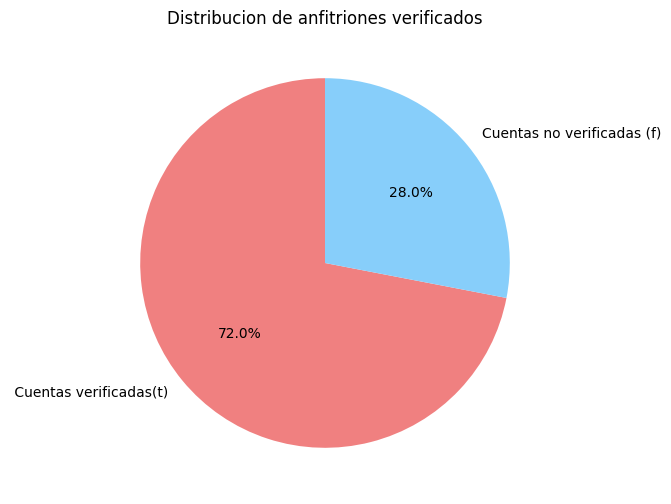

In [5]:
import matplotlib.pyplot as plt

if 'host_identity_verified' in data.columns:
    # Cantidad por variable
    cantidad_por_variable = data['host_identity_verified'].value_counts()
    
    # Crear gráfico de tarta
    plt.figure(figsize=(6, 6))
    cantidad_por_variable.plot.pie(
        autopct='%1.1f%%', 
        labels=[ ' Cuentas verificadas(t)','Cuentas no verificadas (f)'], 
        colors=['lightcoral', 'lightskyblue'], 
        startangle=90, 
        explode=(0, 0)  # Resaltar el primer segmento
    )
    plt.title('Distribucion de anfitriones verificados')
    plt.ylabel('')  # Eliminar etiqueta del eje Y
    plt.show()

C:\Users\mby30\AppData\Local\Temp\ipykernel_1364\568927699.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='host_identity_verified', y='host_acceptance_rate', data=df, palette='Set2')


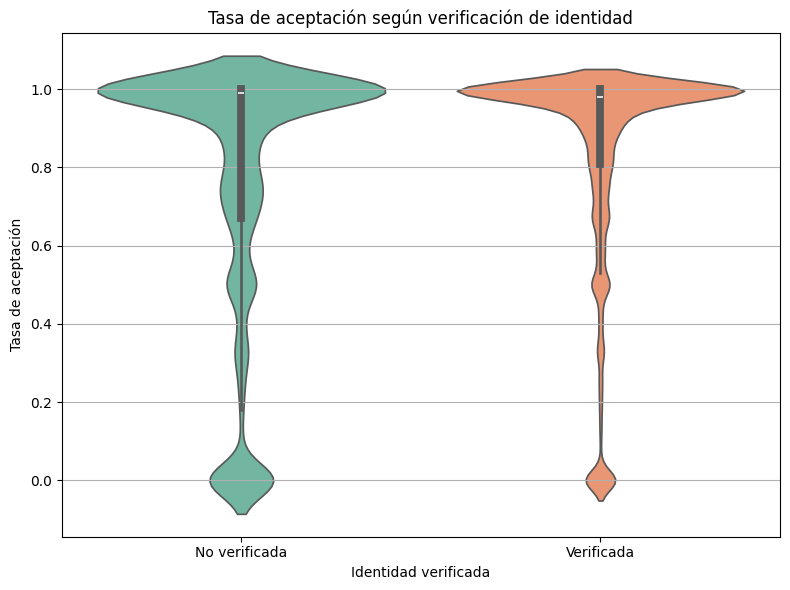

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia de los datos para no modificar el original
df = data.copy()

# Reemplazar valores de 'host_identity_verified' para que sean más descriptivos
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 'Verificada', 'f': 'No verificada'})

# Gráfico de violín
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_identity_verified', y='host_acceptance_rate', data=df, palette='Set2')
plt.title('Tasa de aceptación según verificación de identidad')
plt.xlabel('Identidad verificada')
plt.ylabel('Tasa de aceptación')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
